<a href="https://colab.research.google.com/github/agayatri123/Proyek-Analisa-Data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Anindita Gayatri
- **Email:** agayatri123@yahoo.co.id
- **ID Dicoding:** anindita_gayatri_ukA6

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Data Wrangling

### Gathering Data

In [75]:
# load the dataset
df_hour= pd.read_csv('sample_data/hour.csv')

**Insight:**
- xxx
- xxx

### Assessing Data

In [76]:
# Melihat summary dari struktur data hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [77]:
# Melihat kolom mana saja yang Numeric
num_col=[]
for col in df_hour.columns:
    if(df_hour[col].dtypes!='object'):
        num_col.append(col)
        #print(f"There are total {len(num_col)} numerical columns in dataset")
print(num_col)

['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [78]:
# Melihat kolom mana saja yang Categorical
cat_col=[]
for col in df_hour.columns:
    if(df_hour[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} categorical columns in dataset")
print(cat_col)

There are total 1 categorical columns in dataset
['dteday']


In [79]:
# Check data yang terduplikasi
df.duplicated().sum()

0

**Insight:**
- xxx
- xxx

### Cleaning Data

In [80]:
# Check missing value dengan fungsi isnull()
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [81]:
# Men-drop data kosong walau sebenarnya tidak ditemukan data yang kosong
df_hour.dropna(axis=0, inplace=True)

In [82]:
# Men-drop data yang terduplikasi walau sebenarnya tidak ditemukan data yang terduplikasi
df.drop_duplicates(inplace=True)

**Insight:**
- xxx
- xxx

In [83]:
# Mengecek Season atau Musim yang unik
df_hour.season.unique()

array([1, 2, 3, 4])

In [84]:
# Mengecek Temperatur atau Suhu yang unik
df_hour.temp.unique()

array([0.24, 0.22, 0.2 , 0.32, 0.38, 0.36, 0.42, 0.46, 0.44, 0.4 , 0.34,
       0.3 , 0.26, 0.16, 0.14, 0.18, 0.12, 0.28, 0.1 , 0.08, 0.06, 0.04,
       0.02, 0.52, 0.56, 0.58, 0.6 , 0.48, 0.54, 0.5 , 0.66, 0.64, 0.62,
       0.68, 0.7 , 0.74, 0.76, 0.72, 0.78, 0.82, 0.8 , 0.86, 0.88, 0.9 ,
       0.84, 0.92, 0.94, 0.96, 0.98, 1.  ])

## Exploratory Data Analysis (EDA)

### Explore ...

In [85]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

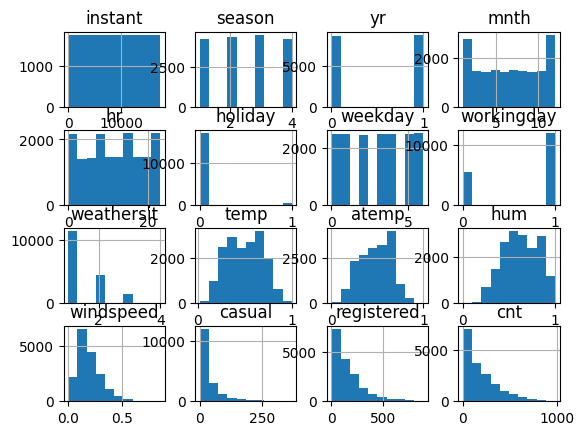

In [86]:
# Melihat distribusi data secara cepat
df_hour.hist()

In [87]:
# Melihat korelasi antar fitur data
df_hour.corr()

ValueError: could not convert string to float: '2011-01-01'

In [96]:
# Mengelompokkan data
df_hour.groupby(by="mnth").max()

,instant,dteday,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mnth,,,,,,,,,,,,,,,,
1,9386,2012-01-31,1,1,23,1,6,1,4,0.58,0.5455,1.00,0.6567,156,518,559
2,10078,2012-02-29,1,1,23,1,6,1,3,0.66,0.6212,1.00,0.8060,229,567,610
3,10821,2012-03-31,2,1,23,0,6,1,3,0.72,0.6515,1.00,0.6866,367,693,957
4,11539,2012-04-30,2,1,23,1,6,1,3,0.80,0.6970,1.00,0.7164,355,697,822
5,12283,2012-05-31,2,1,23,1,6,1,3,0.90,0.8333,1.00,0.6119,361,770,873
6,13003,2012-06-30,3,1,23,0,6,1,3,0.98,0.9242,1.00,0.5821,297,796,900
7,13747,2012-07-31,3,1,23,1,6,1,3,1.00,1.0000,0.94,0.8507,269,790,913
8,14491,2012-08-31,3,1,23,0,6,1,3,0.92,0.8485,0.94,0.8358,289,811,941
9,15211,2012-09-30,4,1,23,1,6,1,3,0.86,0.7879,1.00,0.6418,350,886,977


In [110]:
# Pembulatan kolom temperatur sesuai Celcius
df_hour["temp"] = df_hour["temp"]*100

In [111]:
# Melihat kembali kolom temp (temperatur) setelah dibuatkan sesuai Celcius
df_hour.groupby(by="mnth").max()

,instant,dteday,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mnth,,,,,,,,,,,,,,,,
1,9386,2012-01-31,1,1,23,1,6,1,4,58.0,0.5455,1.00,0.6567,156,518,559
2,10078,2012-02-29,1,1,23,1,6,1,3,66.0,0.6212,1.00,0.8060,229,567,610
3,10821,2012-03-31,2,1,23,0,6,1,3,72.0,0.6515,1.00,0.6866,367,693,957
4,11539,2012-04-30,2,1,23,1,6,1,3,80.0,0.6970,1.00,0.7164,355,697,822
5,12283,2012-05-31,2,1,23,1,6,1,3,90.0,0.8333,1.00,0.6119,361,770,873
6,13003,2012-06-30,3,1,23,0,6,1,3,98.0,0.9242,1.00,0.5821,297,796,900
7,13747,2012-07-31,3,1,23,1,6,1,3,100.0,1.0000,0.94,0.8507,269,790,913
8,14491,2012-08-31,3,1,23,0,6,1,3,92.0,0.8485,0.94,0.8358,289,811,941
9,15211,2012-09-30,4,1,23,1,6,1,3,86.0,0.7879,1.00,0.6418,350,886,977


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2